# Amazon Sales Analysis

## Attribute Information

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Judging the Dataset

In [3]:
df = pd.read_csv('Amazon Sales data.csv')

In [4]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### Removing unwanted attributes

In [5]:
df.drop('Order ID',axis=1,inplace=True)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### Extracting Year and Month from the Order date column

In [6]:
df['Years'] = [x[::-1][:4][::-1] for x in df['Order Date']]
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Years
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013


In [7]:
months = [x.split('/')[0] for x in df['Order Date']]

In [8]:
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = [month_list[int(y)-1] for y in months]

In [9]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Years,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,May
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,August
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,May
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,June
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,February


In [10]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Years,Month
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,2011,July
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,2011,November
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,2016,June
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,2015,July
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91,2012,February


### Final shape of the dataset

In [11]:
df.shape

(100, 15)

In [12]:
df.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


### Visualization of Atrributes 

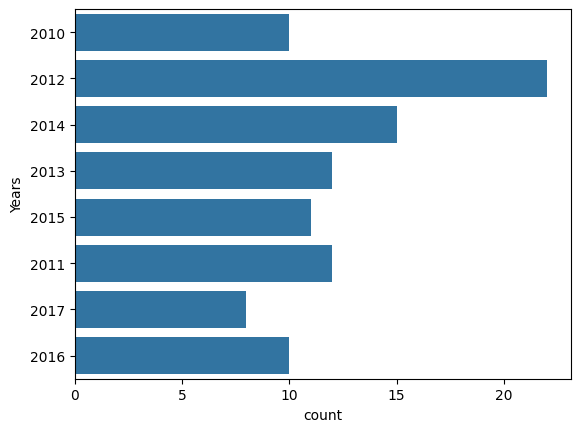

In [13]:
sns.countplot(df['Years'])
plt.show()

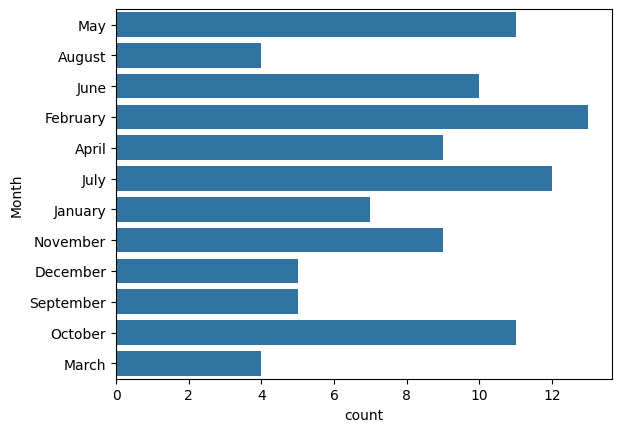

In [14]:
sns.countplot(df['Month'])
plt.show()

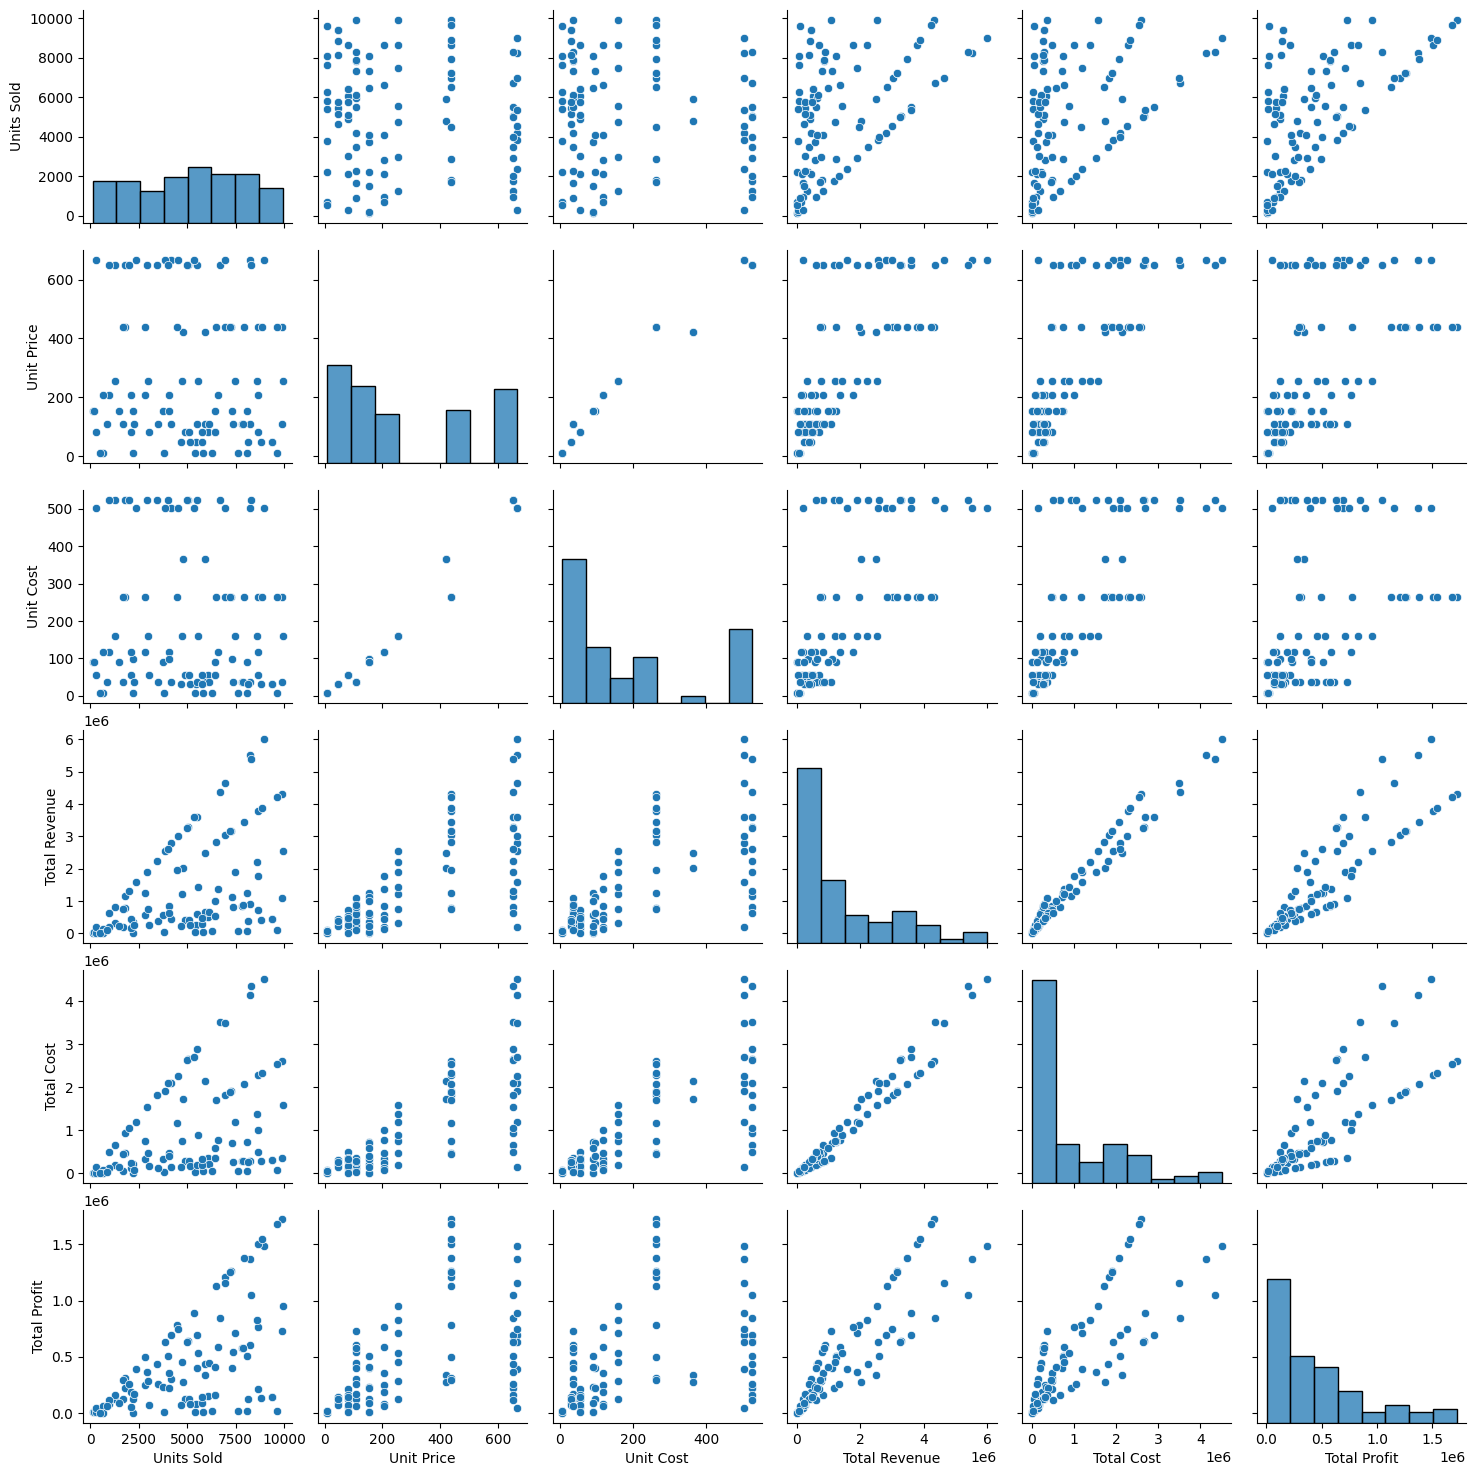

In [15]:
sns.pairplot(df)
plt.show()

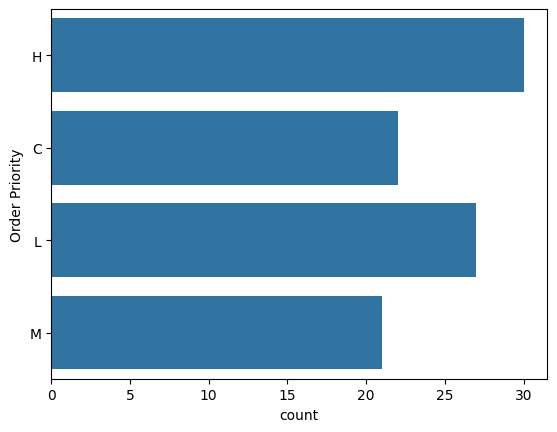

In [16]:
sns.countplot(df['Order Priority'])
plt.show()

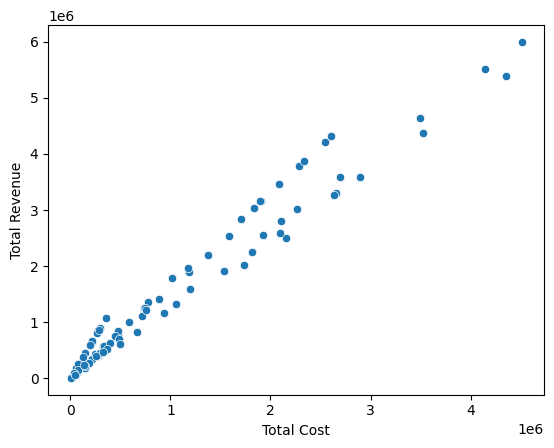

In [17]:
sns.scatterplot(x=df['Total Cost'],y=df['Total Revenue'],data=df)
plt.show()

C:\Users\BHAWESH SINHA\AppData\Local\Temp\ipykernel_12508\1421547604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Units Sold'])


<Axes: xlabel='Units Sold', ylabel='Density'>

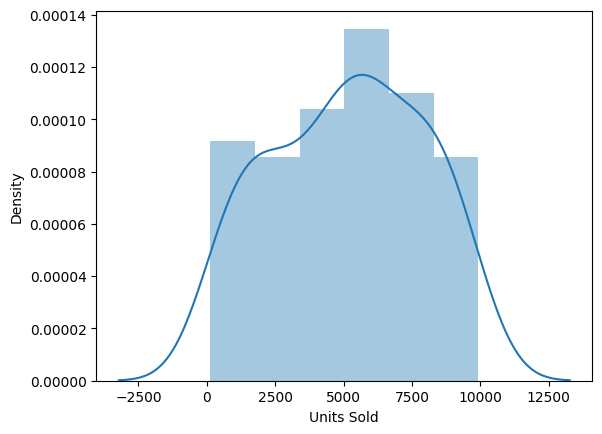

In [26]:
sns.distplot(df['Units Sold'])

In [19]:
df.value_counts('Country')

Country
The Gambia               4
Mexico                   3
Australia                3
Sao Tome and Principe    3
Sierra Leone             3
                        ..
Lithuania                1
Macedonia                1
Madagascar               1
Angola                   1
Zambia                   1
Name: count, Length: 76, dtype: int64

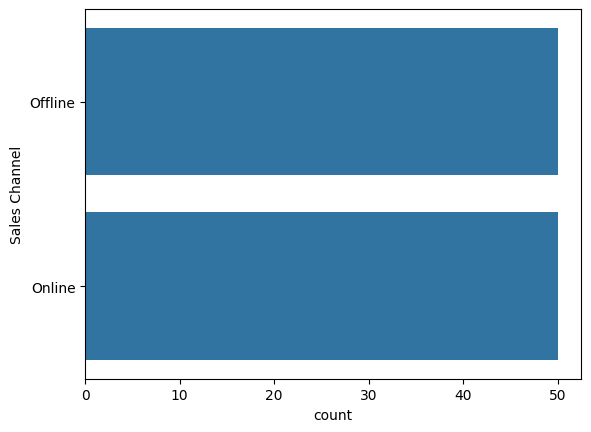

In [20]:
sns.countplot(df['Sales Channel'])
plt.show()

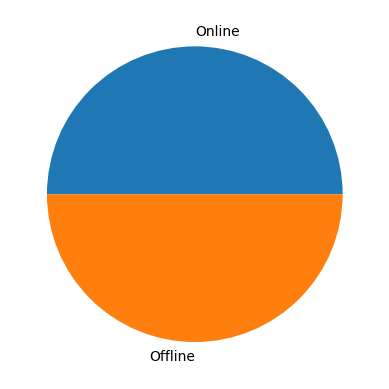

In [21]:
plt.pie(df.value_counts('Sales Channel'),labels=['Online','Offline'])
plt.show()

In [22]:
pd.value_counts(df['Item Type'])

C:\Users\BHAWESH SINHA\AppData\Local\Temp\ipykernel_12508\3356874946.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Item Type'])


Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

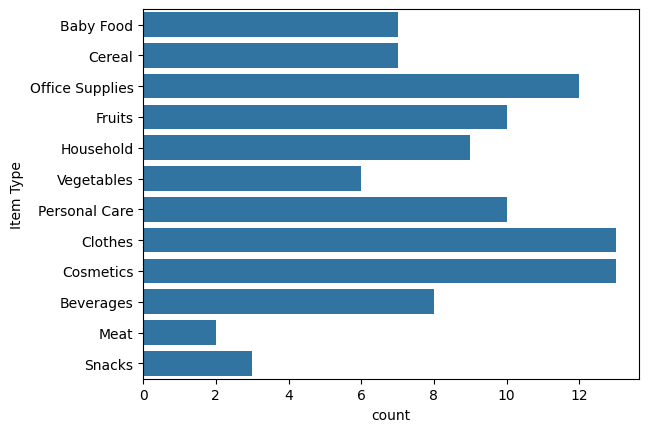

In [23]:
sns.countplot(df['Item Type'])
plt.show()

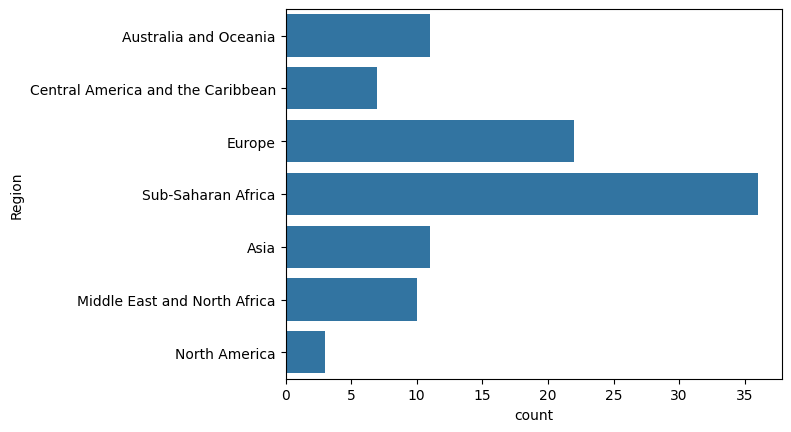

In [24]:
sns.countplot(df['Region'])
plt.show()

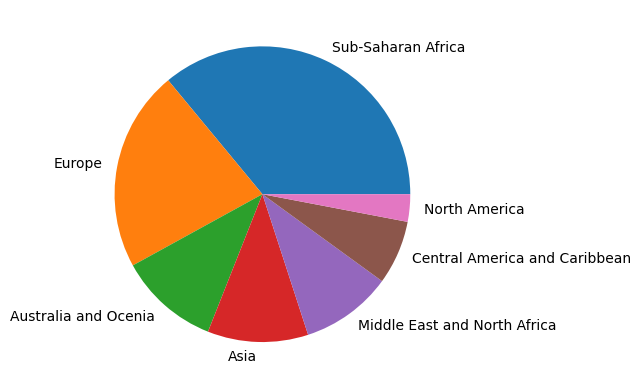

<Figure size 50000x50000 with 0 Axes>

In [25]:
plt.pie(df.value_counts('Region'),labels=['Sub-Saharan Africa','Europe','Australia and Ocenia','Asia','Middle East and North Africa','Central America and Caribbean','North America'])
plt.figure(figsize=(500,500))
plt.show()